In [19]:
import matplotlib
matplotlib.use("pgf")
pgf_with_rc_fonts = {
    "font.family": "serif",
    "font.serif": [u'Adobe Caslon Pro'],                   # use latex default serif font
    "font.sans-serif": ["Consolas"], # use a specific sans-serif font
}
matplotlib.rcParams.update(pgf_with_rc_fonts)

import cPickle as pkl
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.nonparametric.smoothers_lowess import lowess

In [2]:
prot_per_transcript_speeds = pkl.load(open('../../parameters/prot_per_transcript_speeds.p'))
transcriptome_shah = pkl.load(open('../../parameters/transcriptome_shah.p'))

In [3]:
pd.Series(prot_per_transcript_speeds).describe()

count    4475.000000
mean        0.046298
std         0.029389
min         0.000575
25%         0.026149
50%         0.039370
75%         0.058621
max         0.235920
dtype: float64

In [4]:
pd.Series(transcriptome_shah).describe()

count    4839.000000
mean       12.400496
std        50.939523
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max      1381.000000
dtype: float64

In [5]:
myedgecolor = 'powderblue'
myfacecolor = 'steelblue'

In [26]:
def scatter_dicts(dict1, dict2, xaxislabel=None, yaxislabel=None, fontsize=None, markersize=20,
                  alpha=0.8, figsize=(6, 5), rasterized=True, filename="scatterdict.png"):
    plotkeys = dict1.viewkeys() & dict2.viewkeys() # set intersection
    print len(plotkeys)
    xs = [dict1[key] for key in plotkeys]
    ys = [dict2[key] for key in plotkeys] 

    fig =  plt.figure(figsize=figsize)                

    ax = fig.add_subplot(111)
    #ax.set_rasterization_zorder(1)
    
    ax.grid(True, linestyle = '-', color = '0.75')
  
    ax.set_xscale('log')
    ax.set_yscale('log')
    if xaxislabel:
        ax.set_xlabel(xaxislabel)
        if fontsize:
            ax.set_xlabel(xaxislabel, fontsize=fontsize)
            plt.setp(ax.get_xticklabels(), fontsize=fontsize)
    if yaxislabel:
        ax.set_ylabel(yaxislabel)
        if fontsize:
            ax.set_ylabel(yaxislabel, fontsize=fontsize)
            plt.setp(ax.get_yticklabels(), fontsize=fontsize)

    scat = plt.scatter(xs, ys,
                       #c=plt.rcParams['axes.color_cycle'][0], 
                       c=myfacecolor, 
                       #edgecolor=plt.rcParams['patch.edgecolor'],
                       edgecolor=myedgecolor,
                       s=markersize)
    scat.set_alpha(alpha)
    #scat.set_color()
    #scat.set_edgecolors(plt.rcParams['patch.edgecolor'])
    # , color=, edgecolor=

    points = zip(xs, ys)
    sorted_points = sorted(points)
    new_xs = [point[0] for point in sorted_points][:-2]  # modify to remove outliers 
    new_ys = [point[1] for point in sorted_points][:-2]  # modify to remove outliers
    ylowess = lowess(new_ys, new_xs)[:,1]
    plt.plot(new_xs, ylowess, 'darkred', linewidth=4)

    plt.savefig(filename, bbox_inches='tight', dpi=400)
    #plt.show()

4475


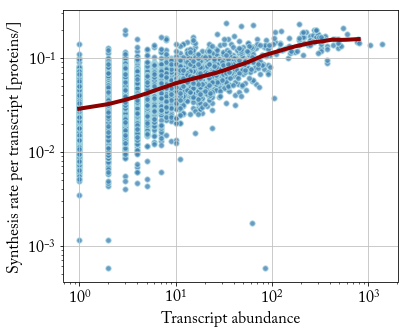

In [27]:
scatter_dicts(transcriptome_shah, prot_per_transcript_speeds, xaxislabel='Transcript abundance', 
              yaxislabel='Synthesis rate per transcript [proteins/]', fontsize=16, markersize=30,
              alpha=0.8, figsize=(6, 5), rasterized=True, filename="co-translational_amplification.pgf")